In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [57]:
df_icu = pd.read_csv('files/icustays.csv')
df = pd.read_csv('merge_diag_pat_proc.csv')
#df_icu['FIRST_CAREUNIT'].nunique()
df_icu['OUTTIME'] = pd.to_datetime(df_icu['OUTTIME'])
df_icu['INTIME'] = pd.to_datetime(df_icu['INTIME'])
df_icu['ICU_LOS']=(df_icu['OUTTIME']-df_icu['INTIME']).dt.total_seconds()/86400
df_icu['ICU_LOS']= round(df_icu['ICU_LOS'])
df_icu['ICU_LOS']

0        3.0
1        3.0
2        3.0
3        2.0
4        2.0
        ... 
61527    2.0
61528    2.0
61529    1.0
61530    2.0
61531    5.0
Name: ICU_LOS, Length: 61532, dtype: float64

In [58]:
df_icu['FIRST_CAREUNIT'].replace({'CCU': 'ICU', 'CSRU': 'ICU', 'MICU': 'ICU',
                                  'SICU': 'ICU', 'TSICU': 'ICU'}, inplace=True)
icu_list = df_icu.groupby('HADM_ID')['FIRST_CAREUNIT'].apply(list).reset_index()
icu_item = pd.get_dummies(icu_list['FIRST_CAREUNIT'].apply(pd.Series).stack()).sum(level=0)
icu_item1 = icu_item.join(icu_list['HADM_ID'], how="outer")
icu_item2 = df_icu[['HADM_ID', 'ICU_LOS']].groupby('HADM_ID').mean().reset_index()

icu_item3 = icu_item1.merge(icu_item2, how='inner', on='HADM_ID')
df = df.merge(icu_item3, how='outer', on='HADM_ID')




In [59]:
df
#df_group = df_icu.groupby('HADM_ID')
#df_nicu = df_group.agg({
#    'FIRST_CAREUNIT': 'count',
#    'LOS':'mean'
#}).reset_index()

#df_nicu.columns = ['HADM_ID','no_INTENSIVE_CARE','ICU_LOS']

,SUBJECT_ID,HADM_ID,ADMITTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,...,p_misc,p_musculoskeletal,p_nervous,p_nose & mouth,p_obstetrical,p_respiratory,p_urinary,ICU,NICU,ICU_LOS
0,22.0,165315,2196-04-09 12:26:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,23.0,152223,2153-09-03 07:15:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,Religious,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,23.0,124321,2157-10-18 19:34:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,Religious,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,24.0,161859,2139-06-06 16:14:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,Religious,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,25.0,129635,2160-11-02 02:06:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58888,NaN,199957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0
58889,NaN,199958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0
58890,NaN,199961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,5.0
58891,NaN,199967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,2.0


In [60]:
#df_nicu['ICU'] = df_group['FIRST_CAREUNIT'].transform(lambda x: sum(x=='ICU'))
#df_nicu['NICU'] = df_group['FIRST_CAREUNIT'].transform(lambda x: sum(x=='NICU'))
#df_nicu.head()

In [61]:
#df = df.merge(df_nicu, how='inner', on='HADM_ID')
#df['ICU'].fillna(value=0, inplace=True)
#df['NICU'].fillna(value=0, inplace=True)

In [62]:
# Replace NaNs with 0
#df['no_INTENSIVE_CARE'].fillna(value=0, inplace=True)
#df['ICU_LOS'].fillna(value=0, inplace=True)
df.to_csv('merge_diag_pat_proc_icu.csv',index=False)

In [63]:
df

,SUBJECT_ID,HADM_ID,ADMITTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,...,p_misc,p_musculoskeletal,p_nervous,p_nose & mouth,p_obstetrical,p_respiratory,p_urinary,ICU,NICU,ICU_LOS
0,22.0,165315,2196-04-09 12:26:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,23.0,152223,2153-09-03 07:15:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,Religious,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,23.0,124321,2157-10-18 19:34:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,Religious,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,24.0,161859,2139-06-06 16:14:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,Religious,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,25.0,129635,2160-11-02 02:06:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58888,NaN,199957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0
58889,NaN,199958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0
58890,NaN,199961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,5.0
58891,NaN,199967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,2.0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58893 entries, 0 to 58892
Data columns (total 53 columns):
SUBJECT_ID             46825 non-null float64
HADM_ID                58893 non-null int64
ADMITTIME              46825 non-null object
DEATHTIME              0 non-null float64
ADMISSION_TYPE         46825 non-null object
ADMISSION_LOCATION     46825 non-null object
DISCHARGE_LOCATION     46825 non-null object
INSURANCE              46825 non-null object
LANGUAGE               26286 non-null object
RELIGION               46513 non-null object
MARITAL_STATUS         46825 non-null object
ETHNICITY              46825 non-null object
DIAGNOSIS              46810 non-null object
LOS                    46825 non-null float64
d_blood                46825 non-null float64
d_circulatory          46825 non-null float64
d_congenital           46825 non-null float64
d_digestive            46825 non-null float64
d_endocrine            46825 non-null float64
d_genitourinary        46825 non-

C:\Users\gavry\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\gavry\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


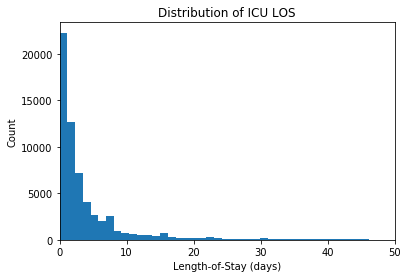

In [64]:
plt.hist(df_icu['ICU_LOS'], bins=150)
plt.xlim(0, 50)
plt.title('Distribution of ICU LOS')
plt.ylabel('Count')
plt.xlabel('Length-of-Stay (days)')
#plt.tick_params(top=False, right=False) 
plt.show();